# Customer Service request Analysis - Project Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
from scipy import stats
%matplotlib inline

## Task 1

### Importing the NYC311 Data

In [2]:
customerSR = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False)

In [3]:
customerSR.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


#### Checking Shape of the dataframe

In [4]:
customerSR.shape

(300698, 53)

#### Checking datatypes and null values of each column 

In [5]:
customerSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

#### Checking Missing Values

In [6]:
missing = customerSR.isnull().sum()  # findig out missing values
missing = missing.sort_values() # sorting the missing values
missing = missing[missing > 0] # columns with 0 missing values are removed

#### Converting it into percent so that we can get the idea of what percent of missing values are present in the columns

In [7]:
missing_percent = (missing/customerSR.shape[0])*100
missing_percent

School Zip                          0.000333
School Region                       0.000333
School Code                         0.000333
Due Date                            0.000998
Location Type                       0.043565
Closed Date                         0.719659
Facility Type                       0.721987
Resolution Action Updated Date      0.727308
City                                0.869311
Incident Zip                        0.869643
Address Type                        0.936155
Latitude                            1.177261
Y Coordinate (State Plane)          1.177261
X Coordinate (State Plane)          1.177261
Longitude                           1.177261
Location                            1.177261
Descriptor                          1.966757
Street Name                        14.768971
Incident Address                   14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersecti

#### since there are missing values ranging from 0% to 100%, I am putting filter for the missing values greater than 2%

In [8]:
missing_percent = missing_percent[missing_percent>2]

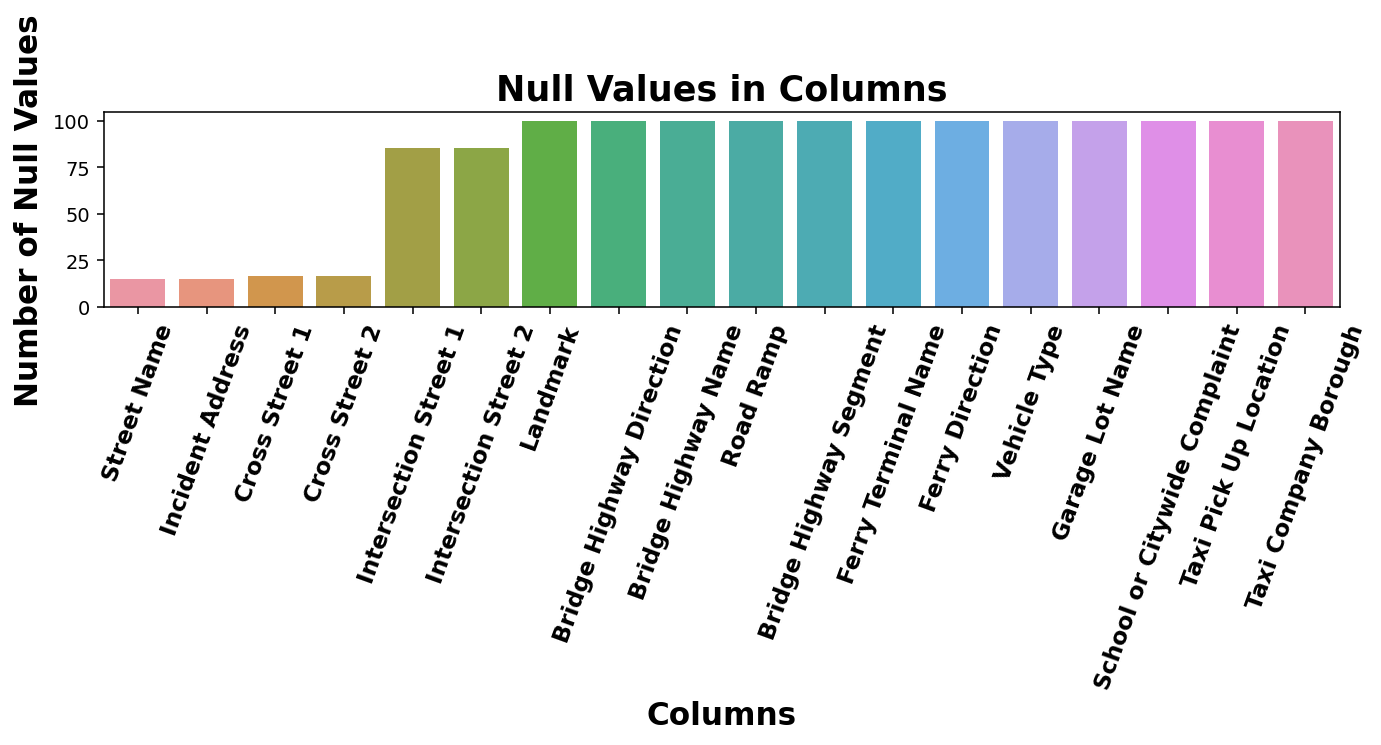

In [9]:
# plotting the missing values as bar graph
plt.figure(figsize=(10,5),dpi=140)
sns.barplot(x= missing_percent.index, y = missing_percent.values)
plt.xticks(rotation=70,fontsize=12)
plt.title('Null Values in Columns', fontsize=18, fontweight="bold")
plt.ylabel('Number of Null Values', fontsize=16, fontweight="bold")
plt.xlabel('Columns', fontsize=16, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.tight_layout()

#### I see that there are columns that have more then 85% missing values, therefore, dropping them

In [10]:
cols_to_drop = missing_percent[missing_percent>85].index
customerSR = customerSR.drop(cols_to_drop.to_list(), axis=1)
print(f'{len(cols_to_drop)} columns have been dropped. as they were having more than 85% missing values.')

14 columns have been dropped. as they were having more than 85% missing values.


#### Visualizing the missing numbers in remaining columns

<Figure size 2250x1350 with 0 Axes>

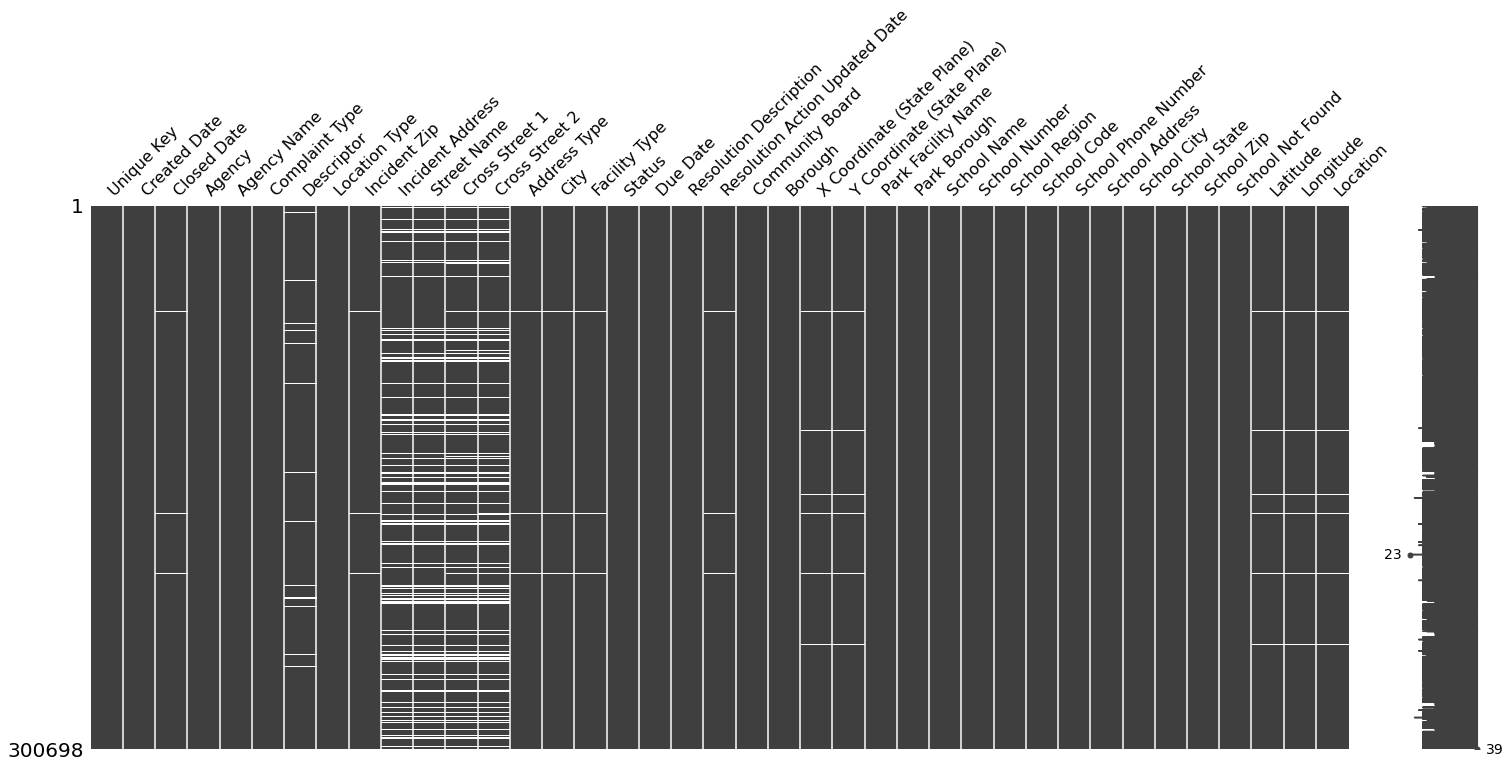

In [11]:
plt.figure(figsize=(15,9), dpi=150)
msno.matrix(customerSR)
plt.show()

### From the above matrix of missing values, we get the following observations:
- From the above matrix, 4 colums have lot of missing values across the same rows.
- Also, the missing values across these 4 colums almost lies in same row.
- Imputation may not be appropriate, we may have lot of dummy/guessed data

#### Columns having lesser than 85% missing values (which are not removed)

In [12]:
less_85_missing = (missing_percent[~(missing_percent>85)]).round(2)
heading = pd.Series({'Columns':'Percent Missing Values'})
heading.append(less_85_missing)

Columns             Percent Missing Values
Street Name                          14.77
Incident Address                     14.77
Cross Street 1                       16.39
Cross Street 2                       16.55
dtype: object

## Task 2

### Converting the columns ‘Created Date’ and Closed Date’ to datetime, and creating new column ‘Request_Closing_Time’ 

#### Checking if there are any null values in date related columns

In [13]:
dates = customerSR[['Created Date','Closed Date','Due Date','Resolution Action Updated Date']].isnull().sum()

#### Converting in Percent Format, for better understanding

In [14]:
(dates/customerSR.shape[0])*100

Created Date                      0.000000
Closed Date                       0.719659
Due Date                          0.000998
Resolution Action Updated Date    0.727308
dtype: float64

#### Since missing dates are less then 1%, I am dropping them, becuase imputation will still be a guess

In [15]:
customerSR.dropna( how='any', subset=['Created Date','Closed Date','Due Date','Resolution Action Updated Date'], inplace=True)

#### All the missing dates have been removed

In [16]:
customerSR[['Created Date','Closed Date','Due Date','Resolution Action Updated Date']].isnull().sum()

Created Date                      0
Closed Date                       0
Due Date                          0
Resolution Action Updated Date    0
dtype: int64

#### Checing the data type of the dates column

In [17]:
dates = customerSR[['Created Date','Closed Date','Due Date','Resolution Action Updated Date']]
dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298495 entries, 0 to 300697
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Created Date                    298495 non-null  object
 1   Closed Date                     298495 non-null  object
 2   Due Date                        298495 non-null  object
 3   Resolution Action Updated Date  298495 non-null  object
dtypes: object(4)
memory usage: 11.4+ MB


#### Converting the date-related columns to 'datetime' object

In [18]:
# Below is the loop-way of converting to datetime, but it took longer time. so commenting

# dates_index = ['Created Date','Closed Date','Due Date','Resolution Action Updated Date']
# for index in dates_index:
#     customerSR[index] = pd.to_datetime(customerSR[index])

In [19]:
dates_index = ['Created Date','Closed Date','Due Date','Resolution Action Updated Date']
customerSR[dates_index] = customerSR[dates_index].apply(pd.to_datetime)

#### All the date related columns have been converted to datetime object type

In [20]:
customerSR[['Created Date','Closed Date','Due Date','Resolution Action Updated Date']].head()

,Created Date,Closed Date,Due Date,Resolution Action Updated Date
0,2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,2016-01-01 00:55:00
1,2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,2016-01-01 01:26:00
2,2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00,2016-01-01 04:51:00
3,2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00,2016-01-01 07:43:00
4,2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00,2016-01-01 03:24:00


#### Creating 'Request_Closing_Time' as the time difference between creation and closing of request

In [21]:
customerSR['Request_Closing_Time'] = customerSR['Closed Date'] - customerSR['Created Date']
customerSR[['Created Date','Closed Date','Due Date','Resolution Action Updated Date','Request_Closing_Time']].head()

,Created Date,Closed Date,Due Date,Resolution Action Updated Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,2016-01-01 00:55:00,0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,2016-01-01 01:26:00,0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00,2016-01-01 04:51:00,0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00,2016-01-01 07:43:00,0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00,2016-01-01 03:24:00,0 days 03:27:02


In [22]:
customerSR.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

#### 'Request_Closing_Time' is in days, hours:mins:sec format, converting it into total no. of seconds

In [23]:
customerSR['Request_Closing_Time_tot_hrs'] = customerSR['Request_Closing_Time']/np.timedelta64(1, 'h')
customerSR['Request_Closing_Time'] = customerSR['Request_Closing_Time']/np.timedelta64(1, 's')
customerSR[['Created Date','Closed Date','Due Date','Resolution Action Updated Date','Request_Closing_Time']].head()

,Created Date,Closed Date,Due Date,Resolution Action Updated Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,2016-01-01 00:55:00,3315.0
1,2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,2016-01-01 01:26:00,5176.0
2,2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00,2016-01-01 04:51:00,17491.0
3,2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00,2016-01-01 07:43:00,27914.0
4,2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00,2016-01-01 03:24:00,12422.0


## Task 3:

### Analysis - Major Insights

In [24]:
customerSR.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time', 'Request_Closing_Time_tot_hrs'],
      dtype='object')

In [25]:
customerSR['Agency'].unique()

array(['NYPD'], dtype=object)

In [26]:
(customerSR['Agency Name'].value_counts()/customerSR.shape[0])*100

New York City Police Department    99.99799
Internal Affairs Bureau             0.00201
Name: Agency Name, dtype: float64

- Agency is NYPD for all records 
- Agency Names are 'New York City Police Department', and 'Internal Affairs Bureau'
- 99.99% records are for 'New York City Police Department'
- Of 300698 records, only 6 are for 'Internal Affairs Bureau'

#### Checking 'Compaint Types' and respective number of compaints/requests

In [27]:
customerSR['Complaint Type'].isnull().any() # Checking if there is any null value in 'complaint types'

False

In [28]:
complaint_types = customerSR.groupby('Complaint Type').agg('count')['Unique Key']
complaint_types = pd.DataFrame(complaint_types)
complaint_types

,Unique Key
Complaint Type,
Agency Issues,6
Animal Abuse,7768
Animal in a Park,1
Bike/Roller/Skate Chronic,424
Blocked Driveway,76804
Derelict Vehicle,17586
Disorderly Youth,286
Drinking,1275
Graffiti,113


#### Visualizing with the help of Bar-Graph

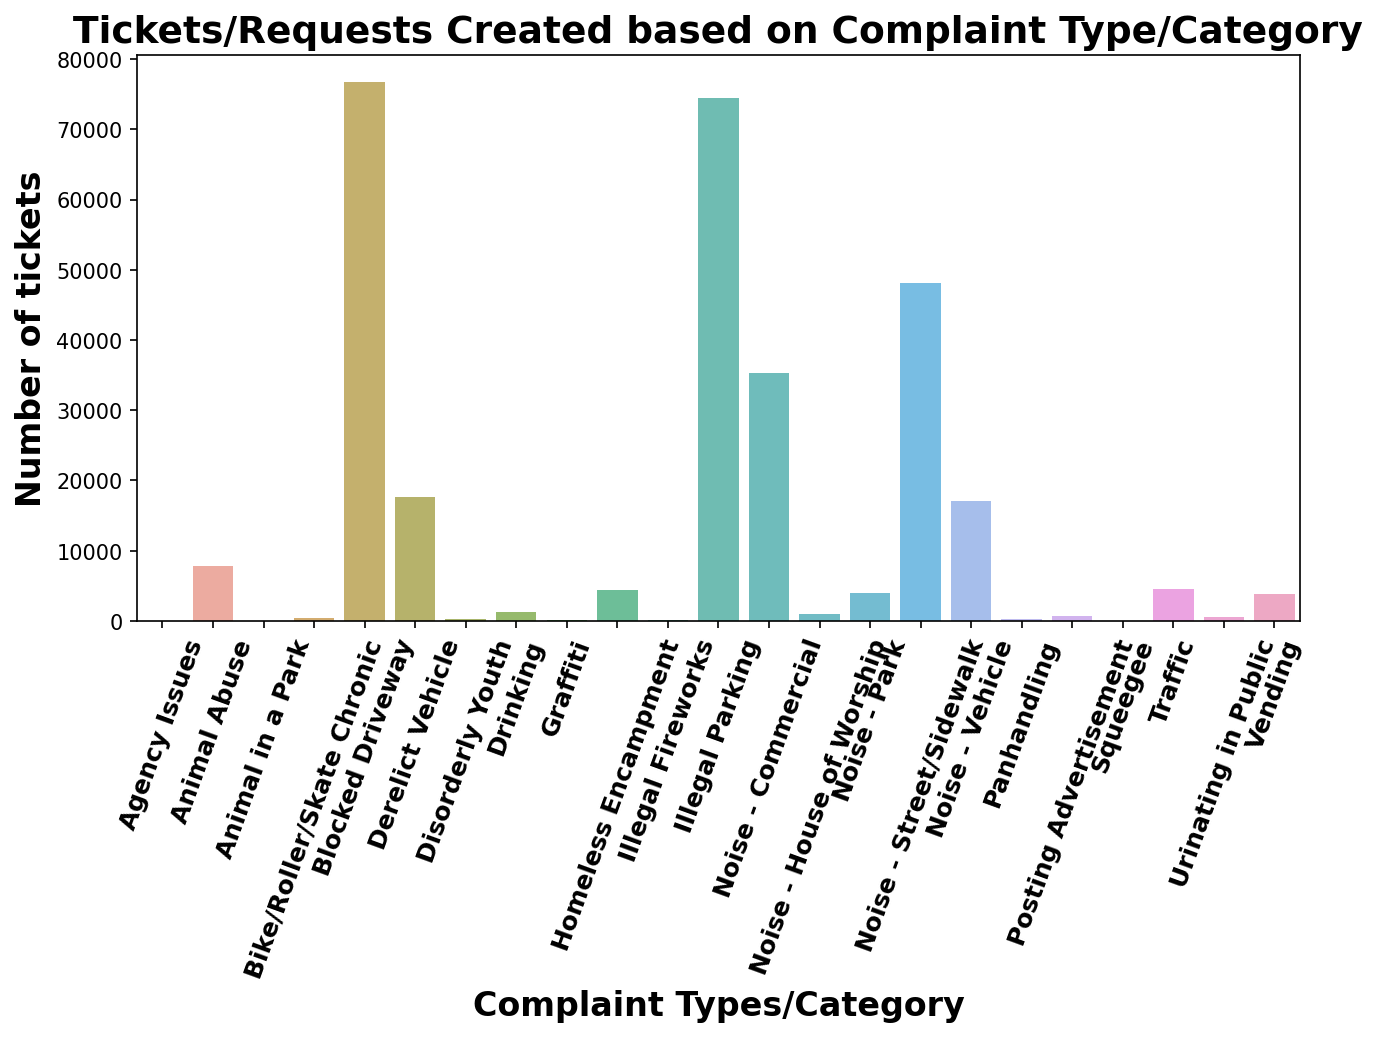

In [29]:
plt.figure(figsize=(10,5),dpi = 150)
sns.barplot(x = complaint_types['Unique Key'].index, 
            y = complaint_types['Unique Key'].values, 
            alpha = 0.8)
plt.title('Tickets/Requests Created based on Complaint Type/Category', fontsize=18, fontweight="bold")
plt.ylabel('Number of tickets', fontsize=16, fontweight="bold")
plt.xlabel('Complaint Types/Category', fontsize=16, fontweight="bold")
plt.xticks(rotation=70,fontsize=12,fontweight="bold")
plt.show()

#### Same can also be achieved by value_counts() function, which gives Complaint Types in decending order by default

In [30]:
complaint_types = customerSR['Complaint Type'].value_counts()
complaint_types = pd.DataFrame(complaint_types)
complaint_types

,Complaint Type
Blocked Driveway,76804
Illegal Parking,74521
Noise - Street/Sidewalk,48068
Noise - Commercial,35245
Derelict Vehicle,17586
Noise - Vehicle,17032
Animal Abuse,7768
Traffic,4493
Homeless Encampment,4414
Noise - Park,4021


#### Let us visualize it with percent and cumulative percent, to get better idea

In [31]:
complaint_types['Percent of Complaints'] = ((complaint_types['Complaint Type']/sum(complaint_types['Complaint Type']))*100).round(2)
complaint_types['Cumulative Percent'] = complaint_types['Percent of Complaints'].cumsum()
complaint_types

,Complaint Type,Percent of Complaints,Cumulative Percent
Blocked Driveway,76804,25.73,25.73
Illegal Parking,74521,24.97,50.70
Noise - Street/Sidewalk,48068,16.10,66.80
Noise - Commercial,35245,11.81,78.61
Derelict Vehicle,17586,5.89,84.50
Noise - Vehicle,17032,5.71,90.21
Animal Abuse,7768,2.60,92.81
Traffic,4493,1.51,94.32
Homeless Encampment,4414,1.48,95.80
Noise - Park,4021,1.35,97.15


In [32]:
# total number of compaint types
len(complaint_types)

23

In [33]:
# complaint type corresponding to the minimum number of complains
complaint_types[complaint_types['Complaint Type'] == complaint_types['Complaint Type'].min()].index[0]

'Animal in a Park'

In [34]:
# complaint type corresponding to the maximum number of complains
complaint_types[complaint_types['Complaint Type'] == complaint_types['Complaint Type'].max()].index[0]

'Blocked Driveway'

In [35]:
# top 5 compalint types
complaint_types.head().index.to_list()

['Blocked Driveway',
 'Illegal Parking',
 'Noise - Street/Sidewalk',
 'Noise - Commercial',
 'Derelict Vehicle']

In [36]:
# Requests contributing top 95% complaint types 
complaint_types[complaint_types['Cumulative Percent']>=95].index.to_list()

['Homeless Encampment',
 'Noise - Park',
 'Vending',
 'Drinking',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Urinating in Public',
 'Bike/Roller/Skate Chronic',
 'Panhandling',
 'Disorderly Youth',
 'Illegal Fireworks',
 'Graffiti',
 'Agency Issues',
 'Squeegee',
 'Animal in a Park']

In [37]:
# Number of complaint types comprising of 95% of total complains
len(complaint_types[complaint_types['Cumulative Percent']>=95].index)

15

In [38]:
# lower 5 compalint types
complaint_types.tail().index.to_list()[::-1]

['Animal in a Park',
 'Squeegee',
 'Agency Issues',
 'Graffiti',
 'Illegal Fireworks']

#### Analysis - Complaint type and Number of requests

- There are total of 23 compaint types/categories
- Of these 23 Categories, 15 complaint types are contributing to 95% of all the requests. There 15 complaint types should be focussed upon, such that lesser requests are created for these types
- Maximum compaint type is for 'Blocked Driveway'. This should be checked if permanent solution can be arranged, to reduce the count of such tickets/requests
- Minimum complaint type is for 'Animal in a Park'.
- Top 5 complaint categories are as follows:
    * 'Blocked Driveway'
    * 'Illegal Parking'
    * 'Noise - Street/Sidewalk'
    * 'Noise - Commercial'
    * 'Derelict Vehicle'
- Lowest 5 complaint categories are as follows:
    * 'Animal in a Park'
    * 'Squeegee'
    * 'Agency Issues'
    * 'Graffiti'
    * 'Illegal Fireworks'


#### Exploring Dates - Created, Closed and Time Elapsed between these

In [39]:
# Checking if there is any missing value
customerSR[['Created Date','Closed Date','Request_Closing_Time']].isnull().any() 

Created Date            False
Closed Date             False
Request_Closing_Time    False
dtype: bool

In [40]:
customerSR[['Created Date','Closed Date','Request_Closing_Time']].head()

,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,3315.0
1,2015-12-31 23:59:44,2016-01-01 01:26:00,5176.0
2,2015-12-31 23:59:29,2016-01-01 04:51:00,17491.0
3,2015-12-31 23:57:46,2016-01-01 07:43:00,27914.0
4,2015-12-31 23:56:58,2016-01-01 03:24:00,12422.0


#### Extracting Month Name and number(1-12), and year

In [41]:
# To get number of respective month, 1-12
customerSR['Created_Date_Month_num'] = customerSR['Created Date'].dt.month

#To get number of respective year
customerSR['Created_Date_Year'] = customerSR['Created Date'].dt.year

# To get name of the respective month, Jan to Dec
customerSR['Created_Date_Month'] = customerSR['Created Date'].dt.month_name()


In [42]:
customerSR[['Created Date','Created_Date_Month','Created_Date_Year','Created_Date_Month_num']].head()

,Created Date,Created_Date_Month,Created_Date_Year,Created_Date_Month_num
0,2015-12-31 23:59:45,December,2015,12
1,2015-12-31 23:59:44,December,2015,12
2,2015-12-31 23:59:29,December,2015,12
3,2015-12-31 23:57:46,December,2015,12
4,2015-12-31 23:56:58,December,2015,12


In [43]:
customerSR['Created_Date_Month'].unique().tolist()

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March']

#### Let us see Requests/tickets created on monthly basis

In [44]:
month_wise_ticket = customerSR.groupby(['Created_Date_Month_num','Created_Date_Month']).count()['Unique Key']
month_wise_ticket = pd.DataFrame(month_wise_ticket.reset_index(level=0, drop=True))
month_wise_ticket

,Unique Key
Created_Date_Month,
March,2457
April,27168
May,36069
June,35142
July,34378
August,34773
September,35176
October,32398
November,30594


#### Visualizing in the form of Bar Graph

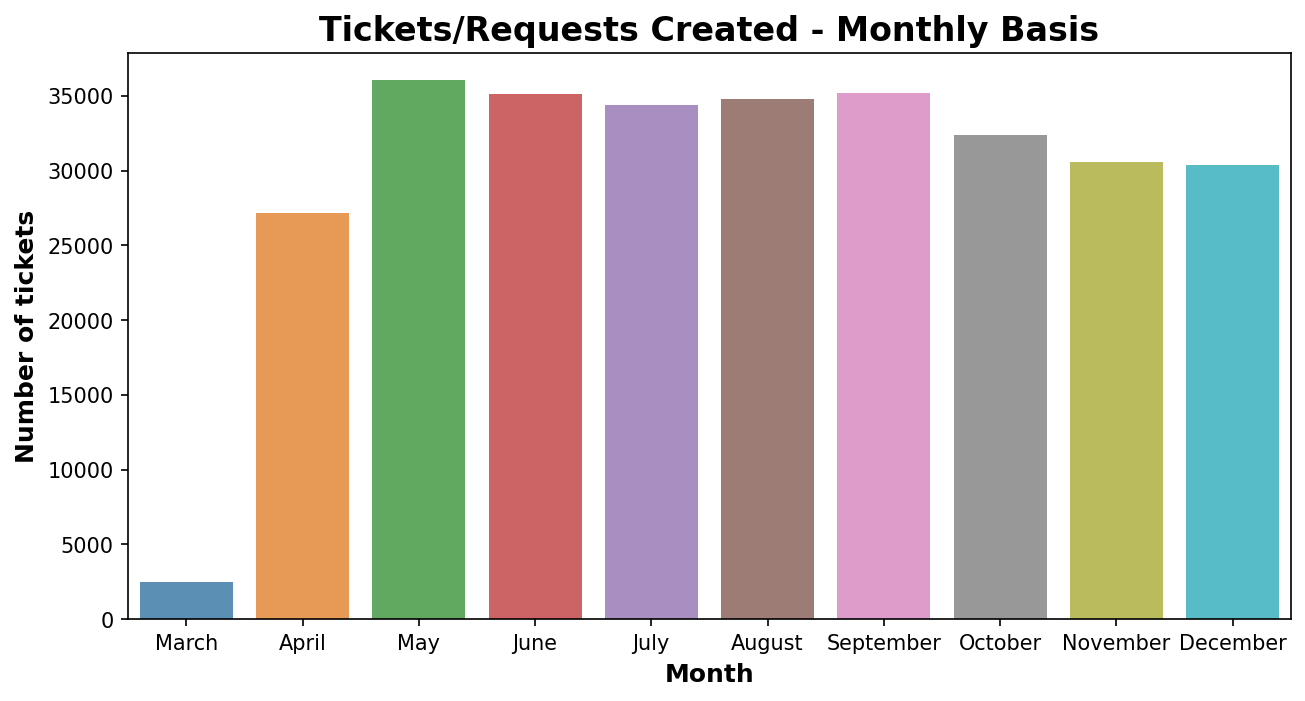

In [45]:
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(x = month_wise_ticket['Unique Key'].index, 
            y = month_wise_ticket['Unique Key'].values, 
            alpha = 0.8)
plt.title('Tickets/Requests Created - Monthly Basis', fontsize=16,fontweight="bold")
plt.ylabel('Number of tickets', fontsize=12,fontweight="bold")
plt.xlabel('Month', fontsize=12,fontweight="bold")
plt.show()

#### Also, let us plot the trend chart, monthwise, to see how the patten of request creation looks like

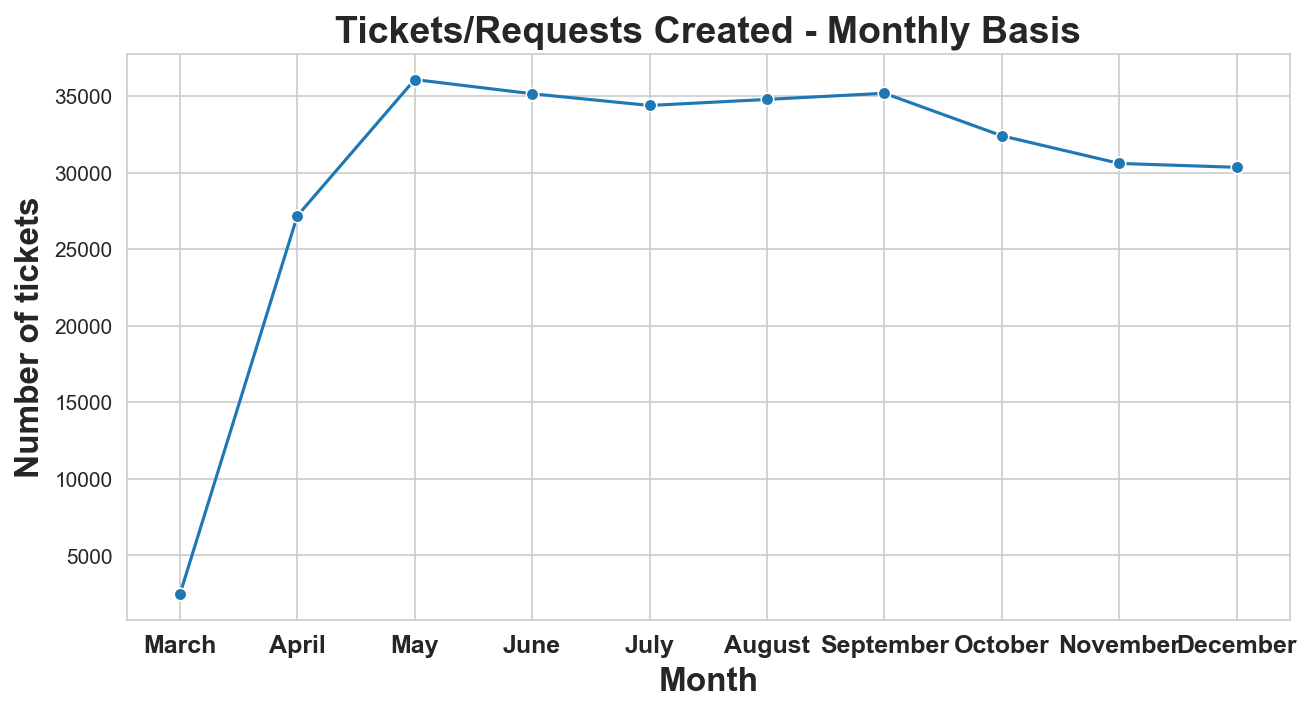

In [46]:
plt.figure(figsize=(10,5), dpi=150)
sns.set_style("whitegrid")
sns.lineplot(x = month_wise_ticket['Unique Key'].index, 
            y = month_wise_ticket['Unique Key'].values, marker='o')
plt.title('Tickets/Requests Created - Monthly Basis', fontsize=18, fontweight="bold")
plt.ylabel('Number of tickets', fontsize=16, fontweight="bold")
plt.xlabel('Month', fontsize=16, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.show()

In [47]:
month_wise_ticket = pd.DataFrame(month_wise_ticket).sort_values(by = 'Unique Key', ascending=False)
month_wise_ticket['Percent of Requests'] = ((month_wise_ticket['Unique Key']/sum(month_wise_ticket['Unique Key']))*100).round(2)
month_wise_ticket['Cumulative Percentage'] = month_wise_ticket['Percent of Requests'].cumsum()
month_wise_ticket

,Unique Key,Percent of Requests,Cumulative Percentage
Created_Date_Month,,,
May,36069,12.08,12.08
September,35176,11.78,23.86
June,35142,11.77,35.63
August,34773,11.65,47.28
July,34378,11.52,58.80
October,32398,10.85,69.65
November,30594,10.25,79.90
December,30340,10.16,90.06
April,27168,9.10,99.16


In [48]:
# month having maximum requests/complains
month_wise_ticket[month_wise_ticket['Unique Key'] == month_wise_ticket['Unique Key'].max()].index[0]

'May'

In [49]:
# month having Minimum requests/complains
month_wise_ticket[month_wise_ticket['Unique Key'] == month_wise_ticket['Unique Key'].min()].index[0]

'March'

In [50]:
# 75% of the tickets/requests created are in the following months
month_wise_ticket[month_wise_ticket['Cumulative Percentage']<=75].index.to_list()

['May', 'September', 'June', 'August', 'July', 'October']

In [51]:
customerSR['Created_Date_Year'].value_counts()

2015    298495
Name: Created_Date_Year, dtype: int64

### Analysis - Number of requests 'Created' on Monthly Basis

- Requests are created on the following months:
    * March
    * April
    * May
    * June
    * July
    * August
    * September
    * October
    * November
    * December

- There were no requests/tickets created in the month of 'January' and 'February', based on the given data
- As we observe from trendchart, we see the tickets/requests were minimum in the month of 'March'. It rose up to attain highest value in the month of 'May'.
- From month 'May' till 'September', the ticket count was almost consistant.
- From month 'September' to 'December', we observe slow decrease in the count of requests/ticket created.
- Maximum tickets/requests created was recorded in the month of 'May'
- Minimum tickets/requests created was recorded in the month of 'March'
- 75% of the tickets/requests created are in the following months:
    * 'May', 'September', 'June', 'August', 'July', 'October'
- We have data for year 2015 only. Therefore, yearwise granuality analysis couldn't be achieved.

#### Let us see Requests/tickets 'Closed' on monthly basis

In [52]:
customerSR[['Unique Key','Closed Date']].isnull().any()

Unique Key     False
Closed Date    False
dtype: bool

In [53]:
customerSR[['Unique Key','Closed Date']].head()

,Unique Key,Closed Date
0,32310363,2016-01-01 00:55:00
1,32309934,2016-01-01 01:26:00
2,32309159,2016-01-01 04:51:00
3,32305098,2016-01-01 07:43:00
4,32306529,2016-01-01 03:24:00


#### Extracting Month Name and number(1-12), and year

In [54]:
# To get number of respective month, 1-12
customerSR['Closed_Date_Month_num'] = customerSR['Closed Date'].dt.month

#To get number of respective year
customerSR['Closed_Date_Year'] = customerSR['Closed Date'].dt.year

# To get name of the respective month, Jan to Dec
customerSR['Closed_Date_Month'] = customerSR['Closed Date'].dt.month_name()


In [55]:
customerSR[['Unique Key','Closed Date','Closed_Date_Month_num','Closed_Date_Year','Closed_Date_Month']].head()

,Unique Key,Closed Date,Closed_Date_Month_num,Closed_Date_Year,Closed_Date_Month
0,32310363,2016-01-01 00:55:00,1,2016,January
1,32309934,2016-01-01 01:26:00,1,2016,January
2,32309159,2016-01-01 04:51:00,1,2016,January
3,32305098,2016-01-01 07:43:00,1,2016,January
4,32306529,2016-01-01 03:24:00,1,2016,January


In [56]:
month_wise_ticket_closed = customerSR.groupby(['Closed_Date_Month_num','Closed_Date_Month']).count()['Unique Key']
month_wise_ticket_closed = pd.DataFrame(month_wise_ticket_closed.reset_index(level=0, drop=True))
month_wise_ticket_closed

,Unique Key
Closed_Date_Month,
January,126
March,2286
April,27101
May,36132
June,35021
July,34378
August,34827
September,35210
October,32342


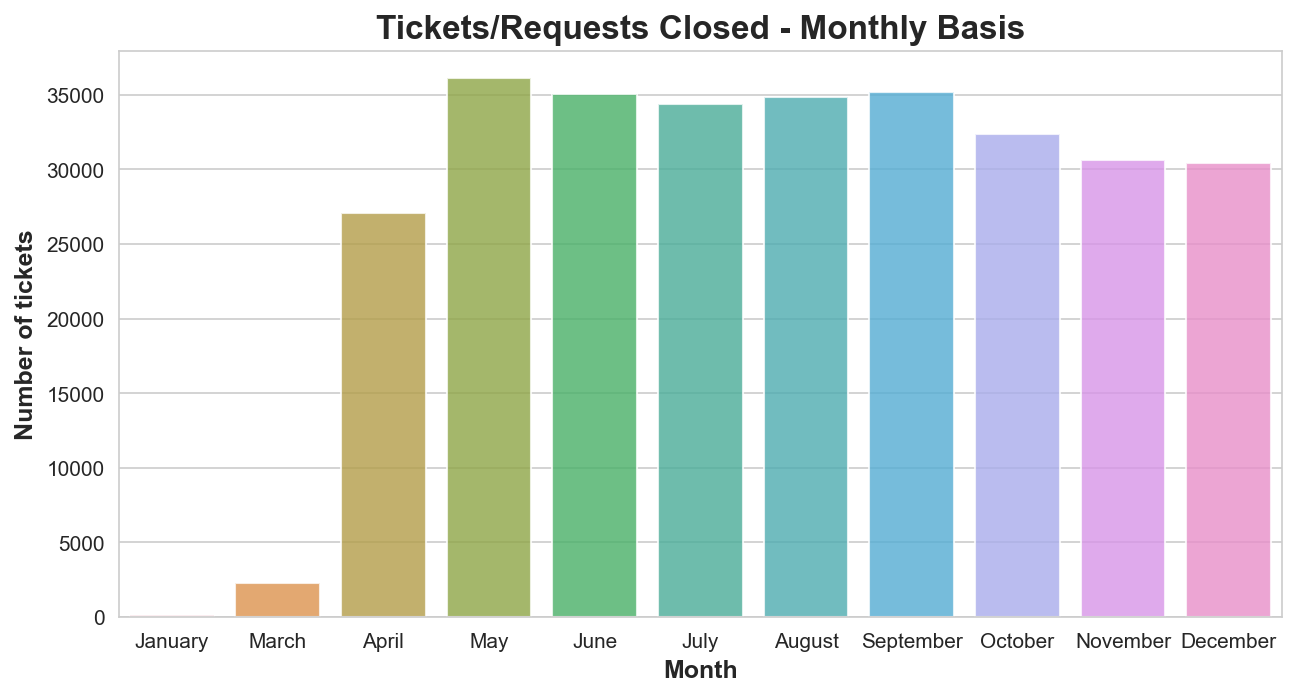

In [57]:
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(x = month_wise_ticket_closed['Unique Key'].index, 
            y = month_wise_ticket_closed['Unique Key'].values, 
            alpha = 0.8)
plt.title('Tickets/Requests Closed - Monthly Basis', fontsize=16,fontweight="bold")
plt.ylabel('Number of tickets', fontsize=12,fontweight="bold")
plt.xlabel('Month', fontsize=12,fontweight="bold")
plt.show()

#### Also, let us plot the trend chart, monthwise, to see how the patten of request closure looks like

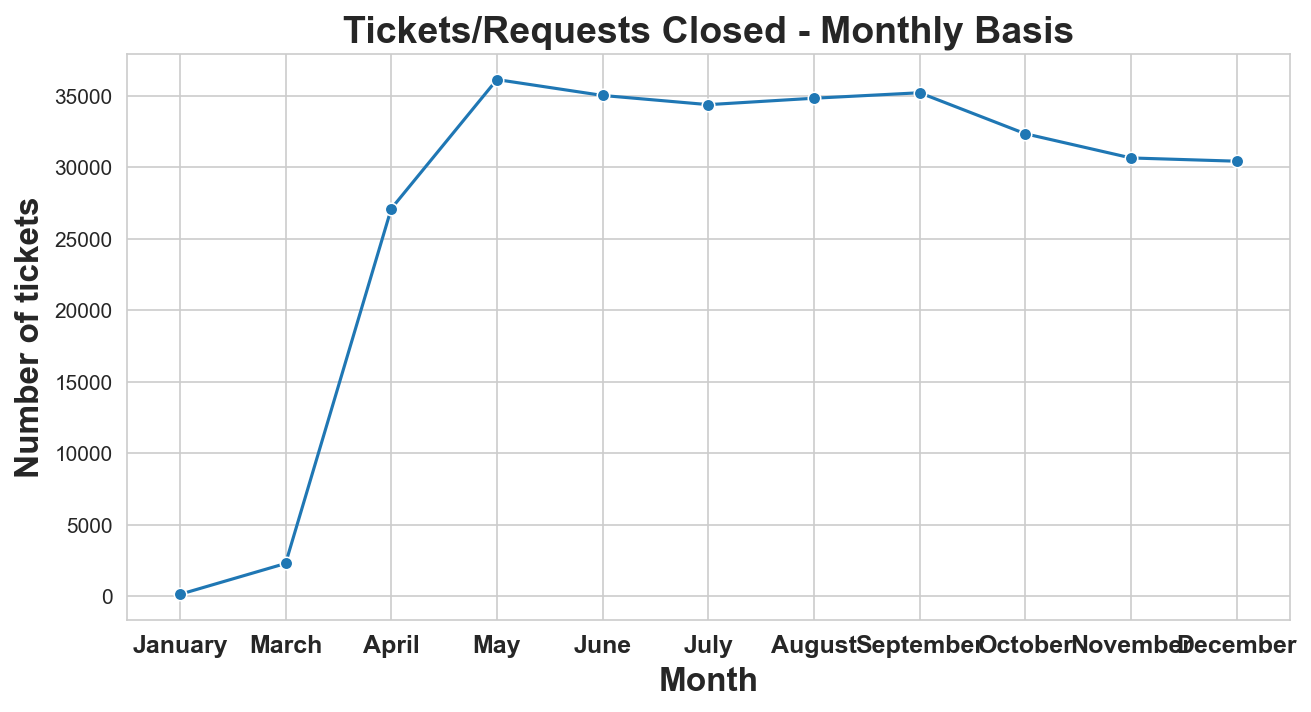

In [58]:
plt.figure(figsize=(10,5),dpi=150)
sns.set_style("whitegrid")
sns.lineplot(x = month_wise_ticket_closed['Unique Key'].index, 
            y = month_wise_ticket_closed['Unique Key'].values, marker='o')
plt.title('Tickets/Requests Closed - Monthly Basis', fontsize=18, fontweight="bold")
plt.ylabel('Number of tickets', fontsize=16, fontweight="bold")
plt.xlabel('Month', fontsize=16, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.show()

In [59]:
month_wise_ticket_closed = pd.DataFrame(month_wise_ticket_closed).sort_values(by = 'Unique Key', ascending=False)
month_wise_ticket_closed['Percent of Requests'] = ((month_wise_ticket_closed['Unique Key']/sum(month_wise_ticket_closed['Unique Key']))*100).round(2)
month_wise_ticket_closed['Cumulative Percentage'] = month_wise_ticket_closed['Percent of Requests'].cumsum()
month_wise_ticket_closed

,Unique Key,Percent of Requests,Cumulative Percentage
Closed_Date_Month,,,
May,36132,12.10,12.10
September,35210,11.80,23.90
June,35021,11.73,35.63
August,34827,11.67,47.30
July,34378,11.52,58.82
October,32342,10.84,69.66
November,30650,10.27,79.93
December,30422,10.19,90.12
April,27101,9.08,99.20


In [60]:
# month having maximum requests/complains closed
month_wise_ticket_closed[month_wise_ticket_closed['Unique Key'] == month_wise_ticket_closed['Unique Key'].max()].index[0]

'May'

In [61]:
# month having minimum requests/complains closed
month_wise_ticket_closed[month_wise_ticket_closed['Unique Key'] == month_wise_ticket_closed['Unique Key'].min()].index[0]

'January'

In [62]:
# top 75% requests were closed in the following month 
month_wise_ticket_closed[month_wise_ticket_closed['Cumulative Percentage'] <= 75].index.to_list()

['May', 'September', 'June', 'August', 'July', 'October']

### Analysis - Number of requests 'Created' on Monthly Basis

- Requests were closed in the following months:
    * January
    * March
    * April
    * May
    * June
    * July
    * August
    * September
    * October
    * November
    * December

- No ticket/requests were closed in the month of February, as per the given data.
- Maximum requests were closed in the month of 'May'
- Minimum requests were closed in the month of 'January'
- From the trend chart, we observe that lowest number of requests were closed in the month of 'January'.
- Then, gradual increase in the ticket/requests closure rose upto highest mark in the month of 'May'.
- From month 'May' to 'September', the closure count was observed as almost constant.
- Very slowly, after 'September', the count of ticket/requeest closure dropped till month 'December'.
- Top 75% requests were closed in the month of 'May', 'September', 'June', 'August', 'July', 'October'.

#### Analysing the time elapsed between requests created and closed

In [63]:
# Distribution of closing time
customerSR[['Request_Closing_Time']].dtypes
dist_of_closing_time = customerSR['Request_Closing_Time'].describe().apply(lambda x: format(x, 'f'))
dist_of_closing_time = pd.DataFrame(dist_of_closing_time)
dist_of_closing_time

,Request_Closing_Time
count,298495.000000
mean,15532.086604
std,21923.264767
min,60.000000
25%,4593.000000
50%,9775.000000
75%,19260.000000
max,2134342.000000


#### defined a function to change number of seconds to time, days-hours-minutes-seconds format

In [64]:
def seconds_to_time(sec):
    res = datetime.timedelta(seconds = sec)
    return res

#### Since the no. of seconds are not conveying any information about 'Request_Closing_Time', adding more column to understand time better

In [65]:
dist_of_closing_time['Time_in_Days']  = list(map(lambda x: seconds_to_time(x), 
                                                 dist_of_closing_time['Request_Closing_Time'].astype(float)))
dist_of_closing_time['Time_in_Hours'] = dist_of_closing_time['Time_in_Days']/np.timedelta64(1, 'h')
dist_of_closing_time['Time_in_Hours'] = np.round(dist_of_closing_time['Time_in_Hours'],2)

In [66]:
dist_of_closing_time

,Request_Closing_Time,Time_in_Days,Time_in_Hours
count,298495.000000,3 days 10:54:55,82.92
mean,15532.086604,0 days 04:18:52.086604,4.31
std,21923.264767,0 days 06:05:23.264767,6.09
min,60.000000,0 days 00:01:00,0.02
25%,4593.000000,0 days 01:16:33,1.28
50%,9775.000000,0 days 02:42:55,2.72
75%,19260.000000,0 days 05:21:00,5.35
max,2134342.000000,24 days 16:52:22,592.87


- So the mean time to serve any request is 04 hours, with standard deviation of 06 hours
- The mean is almost double of the median, indicating there must be outliars

#### Plotting boxplot to see if there are any outliars

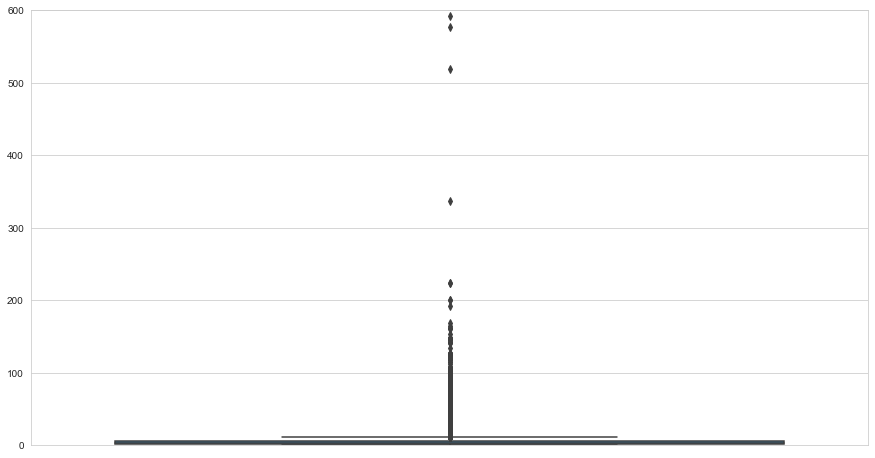

In [67]:
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.boxplot(y=customerSR['Request_Closing_Time_tot_hrs'].values)
plt.ylim(0, 600)
plt.show()

#### In the above figure, the boxplot is barely visible. Though we see lot of dots, indicating outliars, however, the boplot is not clear. Let us try to decrease the ylim to lower value

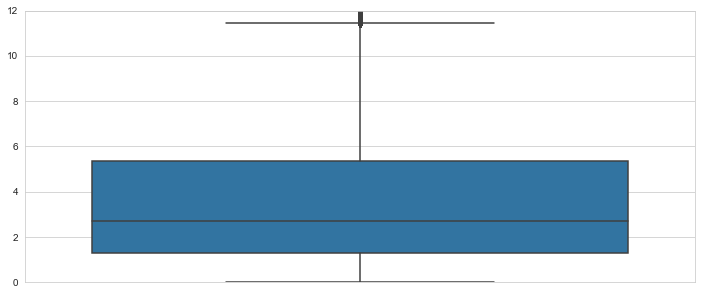

In [68]:
plt.figure(figsize=(12,5))
#sns.set_style("whitegrid")
sns.boxplot(y=customerSR['Request_Closing_Time_tot_hrs'].values)
plt.ylim(0, 12)
plt.show()

#### Boxplot is now clear. There are lot of outliars in our data.  Let us use z-scores to figure th count of outliars in closing time.

In [69]:
customerSR['Request_Closing_Time'].describe().apply(lambda x: format(x, 'f'))

count     298495.000000
mean       15532.086604
std        21923.264767
min           60.000000
25%         4593.000000
50%         9775.000000
75%        19260.000000
max      2134342.000000
Name: Request_Closing_Time, dtype: object

#### Calculating the number of outliars in the column

In [70]:
z = np.abs(stats.zscore(customerSR['Request_Closing_Time']))
threshold = 2.7
rownums = np.where(z > threshold)
rownums[0]

array([    24,     33,    937, ..., 297683, 298029, 298149], dtype=int64)

In [71]:
len(rownums[0]) 

5087

- considering 2.7 as the threshold (2.7 std deviations from mean), we have around 5087 values as outliars

In [72]:
Q1 = customerSR['Request_Closing_Time'].quantile(0.25)
Q3 = customerSR['Request_Closing_Time'].quantile(0.75)
IQR = Q3 - Q1
print(seconds_to_time(IQR))

4:04:27


- because we have lot of outliars in our data, 
- considering median and IQR, time taken to close any request on an average is 02 hours 42 minutes 
- with 04 hours 4 minutes of deviation (IQR)
- some request exceptionally take longer times, maximum exceeding upto 24 days

In [73]:
customerSR['Request_Closing_Days_Time'] = customerSR['Request_Closing_Time']*np.timedelta64(1, 's')

In [74]:
customerSR['Request_Closing_Days_Time'].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Days_Time, dtype: timedelta64[ns]

#### Creating few columns, extracting days, hours, minutes for better analysis

In [75]:
# closing_time['Closing_time_days'] = closing_time['Request_Closing_Time'].dt.days
customerSR['Closing_time_hours'] = customerSR['Request_Closing_Days_Time'].dt.components.hours
customerSR['Closing_time_mins'] = customerSR['Request_Closing_Days_Time'].dt.components.minutes
customerSR['Nearest Days'] = customerSR['Request_Closing_Days_Time'].dt.round('d')
customerSR['Closing_days'] = customerSR['Nearest Days'].dt.days


In [76]:
customerSR[['Request_Closing_Time','Closing_days','Closing_time_hours','Closing_time_mins']].head()

,Request_Closing_Time,Closing_days,Closing_time_hours,Closing_time_mins
0,3315.0,0,0,55
1,5176.0,0,1,26
2,17491.0,0,4,51
3,27914.0,0,7,45
4,12422.0,0,3,27


In [77]:
tickets_closed_days = customerSR['Closing_days'].value_counts()
tickets_closed_days

0     281050
1      16031
2       1074
3        216
4         58
5         38
6         14
7          5
8          3
9          2
14         1
22         1
24         1
25         1
Name: Closing_days, dtype: int64

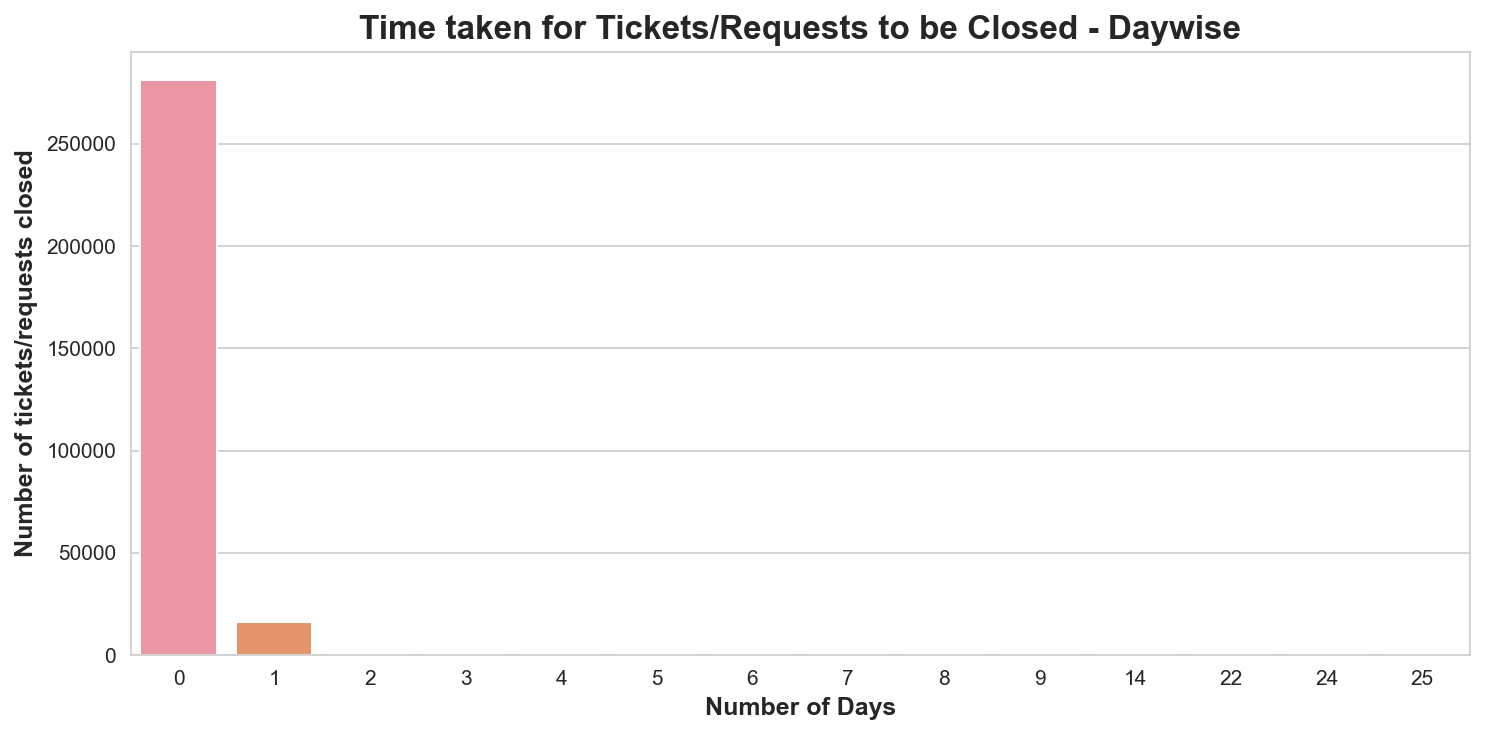

In [78]:
plt.figure(figsize=(10,5),dpi=150)
#tickets_closed_days.plot.bar()
sns.barplot(x = tickets_closed_days.index,
           y = tickets_closed_days.values)
plt.title('Time taken for Tickets/Requests to be Closed - Daywise', fontsize=16,fontweight="bold")
plt.ylabel('Number of tickets/requests closed', fontsize=12,fontweight="bold")
plt.xlabel('Number of Days', fontsize=12,fontweight="bold")
plt.xticks(rotation=0)
plt.tight_layout()

In [79]:
# number of tickets/requests which took longer time to close
sum(tickets_closed_days[tickets_closed_days.index >= 14])

4

In [80]:
# Unique Keys of the requests which took exceptionally longer time to close, > 14 days
customerSR[customerSR['Closing_days']>=14][['Unique Key','Complaint Type']]

,Unique Key,Complaint Type
21268,32167187,Animal Abuse
23664,32154771,Illegal Parking
244488,30684975,Noise - Street/Sidewalk
283132,30427220,Animal in a Park


In [81]:
(tickets_closed_days/sum(tickets_closed_days))*100

0     94.155681
1      5.370609
2      0.359805
3      0.072363
4      0.019431
5      0.012731
6      0.004690
7      0.001675
8      0.001005
9      0.000670
14     0.000335
22     0.000335
24     0.000335
25     0.000335
Name: Closing_days, dtype: float64

### Analysis - Time elapsed to resolve the requests/tickets.

- Maximum number of tickets are closed within a day.
- 99.5% tickets are closed between 0-1 days.
- Remaining exceptional 0.5% tickets are closed between 2 days to 25 days.
- There are 4 requests which took more than 14 days to resolve.
- Unique Keys of the requests which took exceptionally longer time to close, > 14 days, along with the 'Complaint Type', or complaint category.
    * 21268: 'Animal Abuse'
    * 23664:'Illegal Parking'
    * 244488:'Noise - Street/Sidewalk'
    * 283132: 'Animal in a Park'

#### Understanding Citywise Closing time of the requests

In [82]:
customerSR[['Unique Key','Request_Closing_Time','Location Type','City']].head()

,Unique Key,Request_Closing_Time,Location Type,City
0,32310363,3315.0,Street/Sidewalk,NEW YORK
1,32309934,5176.0,Street/Sidewalk,ASTORIA
2,32309159,17491.0,Street/Sidewalk,BRONX
3,32305098,27914.0,Street/Sidewalk,BRONX
4,32306529,12422.0,Street/Sidewalk,ELMHURST


In [83]:
customerSR[['Unique Key','Request_Closing_Time','Location Type','City']].isnull().sum()

Unique Key                0
Request_Closing_Time      0
Location Type            91
City                    506
dtype: int64

#### imputing missing cities and Location Type with mode (most occuring categories)

In [84]:
mode = customerSR.filter(['Location Type','City']).mode()
customerSR[['Location Type','City']]=customerSR[['Location Type','City']].fillna(mode.iloc[0])

In [85]:
customerSR[['Unique Key','Request_Closing_Time','Location Type','City']].isnull().sum()

Unique Key              0
Request_Closing_Time    0
Location Type           0
City                    0
dtype: int64

In [86]:
customerSR['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [87]:
citywise_avg_closing_time = customerSR.groupby('City').agg('mean')['Request_Closing_Time'].sort_values(ascending=True)

In [88]:
len(citywise_avg_closing_time)

53

In [89]:
citywise_avg_closing_time.head()

City
ARVERNE            8153.736364
ROCKAWAY PARK      8348.024161
LITTLE NECK        9279.618962
OAKLAND GARDENS    9471.188748
BAYSIDE            9645.599509
Name: Request_Closing_Time, dtype: float64

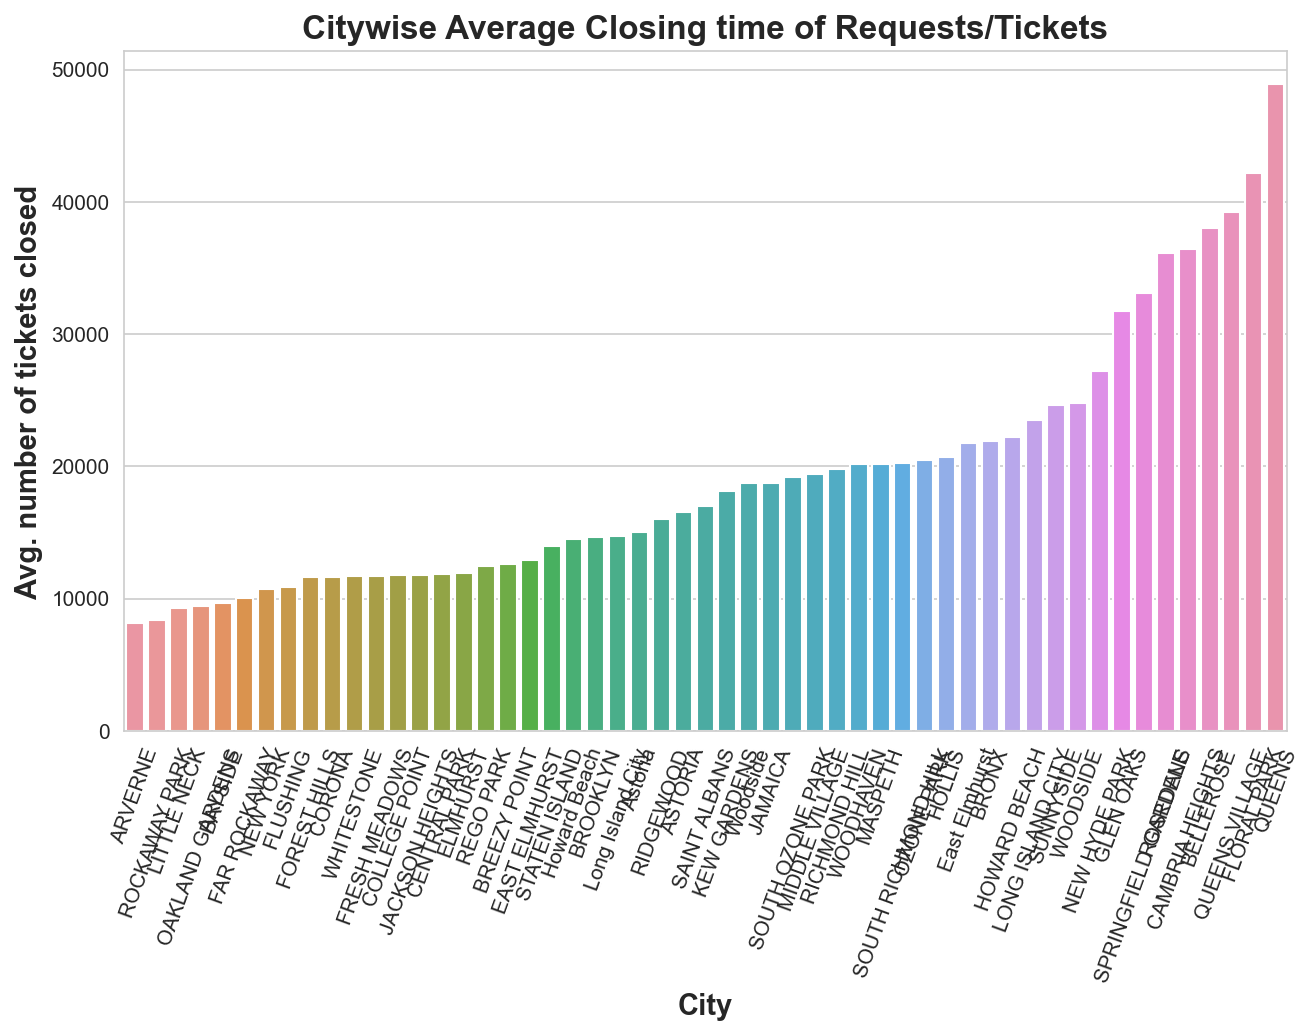

In [90]:
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(x = citywise_avg_closing_time.index, y = citywise_avg_closing_time.values)
plt.title('Citywise Average Closing time of Requests/Tickets', fontsize=16,fontweight="bold")
plt.ylabel('Avg. number of tickets closed', fontsize=14,fontweight="bold")
plt.xlabel('City', fontsize=14,fontweight="bold")
plt.xticks(rotation=70)
plt.show()

#### Converting number of seconds to days, hh:mm:ss to get more insight

In [91]:
citywise_avg_closing_time = citywise_avg_closing_time.apply(lambda x: seconds_to_time(x))

In [92]:
citywise_avg_closing_time

City
ARVERNE               0 days 02:15:53.736364
ROCKAWAY PARK         0 days 02:19:08.024161
LITTLE NECK           0 days 02:34:39.618962
OAKLAND GARDENS       0 days 02:37:51.188748
BAYSIDE               0 days 02:40:45.599509
FAR ROCKAWAY          0 days 02:47:23.986429
NEW YORK              0 days 02:58:21.843718
FLUSHING              0 days 03:01:04.909548
FOREST HILLS          0 days 03:13:26.941943
CORONA                0 days 03:13:42.617373
WHITESTONE            0 days 03:14:41.330601
FRESH MEADOWS         0 days 03:15:33.269900
COLLEGE POINT         0 days 03:16:25.070492
JACKSON HEIGHTS       0 days 03:16:25.197867
CENTRAL PARK          0 days 03:17:39.515464
ELMHURST              0 days 03:18:38.449102
REGO PARK             0 days 03:27:39.940108
BREEZY POINT          0 days 03:29:47.366667
EAST ELMHURST         0 days 03:34:39.582510
STATEN ISLAND         0 days 03:52:48.963032
Howard Beach                 0 days 04:01:45
BROOKLYN              0 days 04:04:25.881500
Long 

In [93]:
# since the average time to resolve the requests is lesser then 1 day, converting it into hours
citywise_avg_closing_time = citywise_avg_closing_time/np.timedelta64(1, 'h')
citywise_avg_closing_time

City
ARVERNE                 2.264927
ROCKAWAY PARK           2.318896
LITTLE NECK             2.577672
OAKLAND GARDENS         2.630886
BAYSIDE                 2.679333
FAR ROCKAWAY            2.789996
NEW YORK                2.972734
FLUSHING                3.018030
FOREST HILLS            3.224151
CORONA                  3.228505
WHITESTONE              3.244814
FRESH MEADOWS           3.259242
COLLEGE POINT           3.273631
JACKSON HEIGHTS         3.273666
CENTRAL PARK            3.294310
ELMHURST                3.310680
REGO PARK               3.461094
BREEZY POINT            3.496491
EAST ELMHURST           3.577662
STATEN ISLAND           3.880268
Howard Beach            4.029167
BROOKLYN                4.073856
Long Island City        4.100759
Astoria                 4.184605
RIDGEWOOD               4.441794
ASTORIA                 4.598913
SAINT ALBANS            4.720868
KEW GARDENS             5.042976
Woodside                5.201389
JAMAICA                 5.212888
SOUTH

In [94]:
# top 5 cities with minimum average time taken to resolve requests
citywise_avg_closing_time.head(5).index.to_list()

['ARVERNE', 'ROCKAWAY PARK', 'LITTLE NECK', 'OAKLAND GARDENS', 'BAYSIDE']

In [95]:
# top 5 cities with maximum average time taken to resolve requests
citywise_avg_closing_time.tail(5).index.to_list()

['CAMBRIA HEIGHTS', 'BELLEROSE', 'QUEENS VILLAGE', 'FLORAL PARK', 'QUEENS']

In [96]:
# Range of the Average time to resolve the request 
round(citywise_avg_closing_time.max() - citywise_avg_closing_time.min(),2)

11.33

- We have 53 total cities and their average time to resolve the requests
-top 5 cities with minimum average time taken to resolve requests
'ARVERNE', 'ROCKAWAY PARK', 'LITTLE NECK', 'OAKLAND GARDENS', 'BAYSIDE'

- top 5 cities with maximum average time taken to resolve requests
'CAMBRIA HEIGHTS', 'BELLEROSE', 'QUEENS VILLAGE', 'FLORAL PARK', 'QUEENS'

- minimum average time taken to resolve the requests is 2.26 hours, and its happens in the city 'ARVERNE'
- maximum average time taken to resolve the requests is 13.59 hours, and its happens in the city 'Queens'

## Task 4
### Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [97]:
location_based_complaints = customerSR.groupby('Location Type').agg('count')['Unique Key'].sort_values()
location_based_complaints

Location Type
Park                               1
Bridge                             2
Subway Station                    34
Roadway Tunnel                    35
Commercial                        62
Vacant Lot                        77
House and Store                   93
Parking Lot                      117
Highway                          214
Residential Building             227
House of Worship                 927
Park/Playground                 4751
Residential Building/House      6953
Club/Bar/Restaurant            17227
Store/Commercial               20183
Street/Sidewalk               247592
Name: Unique Key, dtype: int64

#### Converting it into percentage to get more insight 

In [98]:
percent_location_based_complaints = round((location_based_complaints/sum(location_based_complaints))*100,2)
percent_location_based_complaints

Location Type
Park                           0.00
Bridge                         0.00
Subway Station                 0.01
Roadway Tunnel                 0.01
Commercial                     0.02
Vacant Lot                     0.03
House and Store                0.03
Parking Lot                    0.04
Highway                        0.07
Residential Building           0.08
House of Worship               0.31
Park/Playground                1.59
Residential Building/House     2.33
Club/Bar/Restaurant            5.77
Store/Commercial               6.76
Street/Sidewalk               82.95
Name: Unique Key, dtype: float64

- 83% of the compaints are for location type Street/Sidewalk

#### Let us club the complains lesser than 0.5% as 'Others'

In [99]:
percent_location_based_complaints_new = percent_location_based_complaints[percent_location_based_complaints>0.5]
percent_location_based_complaints_new['Others'] = sum(percent_location_based_complaints[percent_location_based_complaints<=0.5])
percent_location_based_complaints_new = percent_location_based_complaints_new.sort_values()
percent_location_based_complaints_new

Location Type
Others                         0.60
Park/Playground                1.59
Residential Building/House     2.33
Club/Bar/Restaurant            5.77
Store/Commercial               6.76
Street/Sidewalk               82.95
Name: Unique Key, dtype: float64

#### Since 'Others' category is having value less than 1%, dropping it

In [100]:
percent_location_based_complaints_new = percent_location_based_complaints_new[percent_location_based_complaints_new>1]

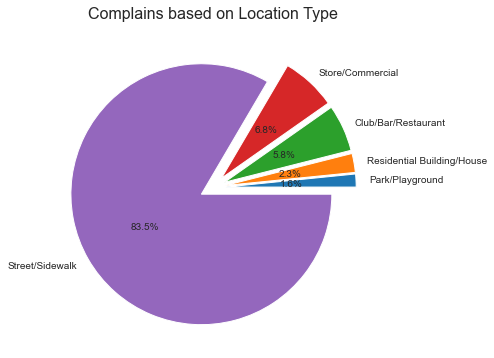

In [101]:
pie, ax = plt.subplots(figsize=[12,6])
labels = percent_location_based_complaints_new.index
plt.pie(x=percent_location_based_complaints_new, autopct="%.1f%%",explode=[0.1]*len(percent_location_based_complaints_new), labels=labels, pctdistance=0.5)
plt.title("Complains based on Location Type", fontsize=16);
plt.show()

In [102]:
# top 3 'Location Types' from where the complains are maximum
percent_location_based_complaints_new.tail(3).index.to_list()[::-1]

['Street/Sidewalk', 'Store/Commercial', 'Club/Bar/Restaurant']

## Task 4
### Statistical Tests

### Task 4.1 
### Whether the average response time across complaint types is similar or not (overall)

In [103]:
customerSR.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time', 'Request_Closing_Time_tot_hrs',
       'Created_Date_Month_num', 'Created_Date_Year', 'Created_Date_Month',
       'Closed_Date_Month_num', 'Closed_Date_Year', 'Closed_Date_Month',
       'Request_Closing_Days_Time', 'Closing_time_hour

In [104]:
customerSR[['Unique Key','Complaint Type','Request_Closing_Time']].head()

,Unique Key,Complaint Type,Request_Closing_Time
0,32310363,Noise - Street/Sidewalk,3315.0
1,32309934,Blocked Driveway,5176.0
2,32309159,Blocked Driveway,17491.0
3,32305098,Illegal Parking,27914.0
4,32306529,Illegal Parking,12422.0


In [105]:
# checking if there are any null values
customerSR[['Unique Key','Complaint Type','Request_Closing_Time']].isnull().sum()

Unique Key              0
Complaint Type          0
Request_Closing_Time    0
dtype: int64

In [106]:
complaint_types_list = list(customerSR['Complaint Type'].unique())
print(f'There are {len(complaint_types_list)} unique complaint types')

There are 23 unique complaint types


###  Whether the average response time across complaint types is similar or not (overall)
- Null Hypothesis: Average response time of all the compaint types are similar (equal)
- Alternate Hypothesis: At least one of the average response time of the compaint types is different

#### * In order to perform ANOVA, I would need Complaint Types and the respective data points (Request Closed Time)
#### * So, I am creating dictionary, such that Complaint Type category is key and data points are values

In [107]:
compliant_type_datapoints = {}
for complaint in complaint_types_list:
    compliant_type_datapoints[complaint]=list(customerSR[customerSR['Complaint Type']==complaint]['Request_Closing_Time'])

In [108]:
compliant_type_datapoints.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Agency Issues', 'Squeegee', 'Animal in a Park'])

In [109]:
stats.f_oneway(
compliant_type_datapoints['Noise - Street/Sidewalk'],
compliant_type_datapoints['Blocked Driveway'],
compliant_type_datapoints['Illegal Parking'],
compliant_type_datapoints['Derelict Vehicle'],
compliant_type_datapoints['Noise - Commercial'],
compliant_type_datapoints['Noise - House of Worship'],
compliant_type_datapoints['Posting Advertisement'],
compliant_type_datapoints['Noise - Vehicle'],
compliant_type_datapoints['Animal Abuse'],
compliant_type_datapoints['Vending'],
compliant_type_datapoints['Traffic'],
compliant_type_datapoints['Drinking'],
compliant_type_datapoints['Bike/Roller/Skate Chronic'],
compliant_type_datapoints['Panhandling'],
compliant_type_datapoints['Noise - Park'],
compliant_type_datapoints['Homeless Encampment'],
compliant_type_datapoints['Urinating in Public'],
compliant_type_datapoints['Graffiti'],
compliant_type_datapoints['Disorderly Youth'],
compliant_type_datapoints['Illegal Fireworks'],
compliant_type_datapoints['Agency Issues'],
compliant_type_datapoints['Squeegee'],
compliant_type_datapoints['Animal in a Park']
)

F_onewayResult(statistic=514.1217802705925, pvalue=0.0)

- Since p value is low, 0, in our case, we reject Null Hypotheses
- This implies that
-  At least one of the average response time of the compaint types is different

#### This is also evident from the below code:

In [110]:
customerSR.groupby('Complaint Type').agg('mean')['Request_Closing_Time'].apply(lambda x: seconds_to_time(x))

Complaint Type
Agency Issues               0 days 05:15:37.166667
Animal Abuse                0 days 05:12:47.677781
Animal in a Park                  14 days 00:50:05
Bike/Roller/Skate Chronic   0 days 03:45:59.264151
Blocked Driveway            0 days 04:44:27.346727
Derelict Vehicle            0 days 07:21:52.617878
Disorderly Youth            0 days 03:33:30.902098
Drinking                    0 days 03:51:42.598431
Graffiti                    0 days 07:09:04.504425
Homeless Encampment         0 days 04:22:01.862936
Illegal Fireworks           0 days 02:45:40.101190
Illegal Parking             0 days 04:30:03.624670
Noise - Commercial          0 days 03:08:49.749014
Noise - House of Worship    0 days 03:11:35.874058
Noise - Park                0 days 03:24:32.394429
Noise - Street/Sidewalk     0 days 03:26:43.428934
Noise - Vehicle             0 days 03:35:20.434124
Panhandling                 0 days 04:22:21.963934
Posting Advertisement       0 days 01:58:33.582689
Squeegee        

- From the above series, we see that 'Animal in a Park' complaint type has an average request closing time 
- of 14 days, compared to other compalint types, which is having average of lesser than a day

#### Are the type of complaint or service requested and location related? 
- Null Hypothesis: There is no relationship between the 'Complaint Type' and 'Location Type' 
- Alternate Hypothesis: There is a relationship between the 'Complaint Type' and 'Location Type' 


In [111]:
customerSR[['Complaint Type','Location Type']].dtypes

Complaint Type    object
Location Type     object
dtype: object

#### 'Complaint Type' and 'Location Type'  are boject types. We will need to use Chi Square test to check if there is any relationship between them

In [112]:
# Checking if there are any null values 
customerSR[['Complaint Type','Location Type']].isnull().any()

Complaint Type    False
Location Type     False
dtype: bool

In [113]:
customerSR[['Complaint Type','Location Type']].head()

,Complaint Type,Location Type
0,Noise - Street/Sidewalk,Street/Sidewalk
1,Blocked Driveway,Street/Sidewalk
2,Blocked Driveway,Street/Sidewalk
3,Illegal Parking,Street/Sidewalk
4,Illegal Parking,Street/Sidewalk


#### Creating a cross-table between 'Complaint Types' and 'Location Type' 

In [114]:
table = customerSR.pivot_table(index = 'Complaint Type', columns='Location Type', aggfunc='count')['Unique Key']
table

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
Animal Abuse,NaN,NaN,62.0,NaN,93.0,NaN,NaN,122.0,110.0,227.0,5081.0,NaN,521.0,1530.0,22.0,NaN
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,53.0,346.0,NaN,NaN
Blocked Driveway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76804.0,NaN,NaN
Derelict Vehicle,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,17491.0,NaN,77.0
Disorderly Youth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,8.0,201.0,NaN,NaN
Drinking,NaN,365.0,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,289.0,NaN,90.0,433.0,NaN,NaN
Graffiti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,32.0,25.0,NaN,NaN


In [115]:
table = table.fillna(0)
table = table.astype(int)
table = table.loc[:, (table != 0).any(axis=0)]
table

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0
Animal Abuse,0,0,62,0,93,0,0,122,110,227,5081,0,521,1530,22,0
Animal in a Park,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,25,0,53,346,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,76804,0,0
Derelict Vehicle,0,0,0,13,0,0,0,0,0,0,0,5,0,17491,0,77
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,77,0,8,201,0,0
Drinking,0,365,0,0,0,0,0,98,0,0,289,0,90,433,0,0
Graffiti,0,0,0,0,0,0,0,0,0,0,56,0,32,25,0,0


In [116]:
chi_calculated, p_val, degree_f, expected_mat = stats.chi2_contingency(table)

In [117]:
print(p_val)

0.0


#### Since the p-value is low, 0 in our case, lower than 0.05, we reject Null Hypothesis
#### There is a relationship between the 'Complaint Type' and 'Location Type'

### ========================= End of Document =========================